<a href="https://colab.research.google.com/github/Rachmatsyaifudin/0046-RF/blob/master/Artificial_Neural_Network_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [ ]:
# Data file path
FILE_PATH = 'iris.csv'

# Dataframe from csv file
iris_data = pd.read_csv(FILE_PATH, header=0)

In [ ]:
iris_data.info()
print("=="*40)
iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [ ]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_label, test_size=0.15)
# Validation set
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)


In [ ]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105, 3)
(4,)


In [ ]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])

    return model

In [ ]:
model = get_model()

# Compile the model
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 2s 88ms/step - loss: 0.9592 - accuracy: 0.4190 - val_loss: 0.5884 - val_accuracy: 0.8000
Epoch 2/30
4/4 [==============================] - 0s 27ms/step - loss: 0.7390 - accuracy: 0.6857 - val_loss: 0.4172 - val_accuracy: 0.9556
Epoch 3/30
4/4 [==============================] - 0s 25ms/step - loss: 0.5148 - accuracy: 0.7714 - val_loss: 0.2983 - val_accuracy: 0.9778
Epoch 4/30
4/4 [==============================] - 0s 24ms/step - loss: 0.3753 - accuracy: 0.8667 - val_loss: 0.1988 - val_accuracy: 0.9333
Epoch 5/30
4/4 [==============================] - 0s 20ms/step - loss: 0.3728 - accuracy: 0.7905 - val_loss: 0.3018 - val_accuracy: 0.8667
Epoch 6/30
4/4 [==============================] - 0s 18ms/step - loss: 0.3174 - accuracy: 0.8762 - val_loss: 0.1513 - val_accuracy: 0.9333
Epoch 7/30
4/4 [==============================] - 0s 19ms/step - loss: 0.3197 - accuracy: 0.8476 - val_loss: 0.1618 - val_accuracy: 0.9333
Epoch 8/30
4/4 [===========

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0316 - accuracy: 1.0000


[0.031647127121686935, 1.0]

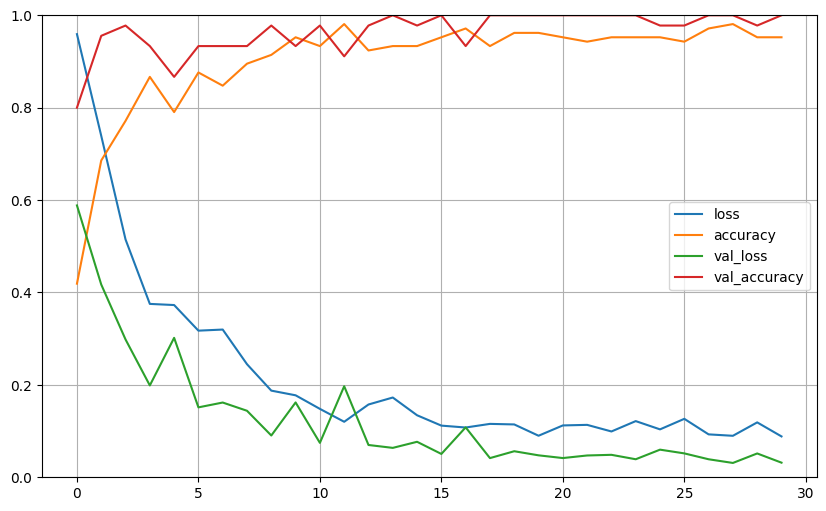

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
new_data, y_actual = X_test[:3], y_test[:3]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 139ms/step
Actual data : [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
1
0
2
